#Soft Computing
##Haar wavelet transformacija


In [14]:
%matplotlib inline

import pywt
from pywt import WaveletPacket2D
import matplotlib.pyplot as plt
import random
from sklearn import datasets
from sklearn import svm
%matplotlib inline

In [15]:
digits = datasets.load_digits()

In [16]:
print(digits.data)
print(len(digits.data))

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
1797


In [92]:
sample = 114
x = digits.images[sample]

In [93]:
print(x)
print(digits.target[sample])

[[  0.   0.   4.   9.  13.   5.   0.   0.]
 [  0.   1.  16.  16.  12.  11.   0.   0.]
 [  0.   0.  11.   8.   5.  16.   0.   0.]
 [  0.   0.   7.  10.  13.  10.   0.   0.]
 [  0.   0.   4.  16.  13.   0.   0.   0.]
 [  0.   0.  13.  15.  12.   0.   0.   0.]
 [  0.   0.  11.   9.  14.   5.   0.   0.]
 [  0.   0.   0.  10.  16.   8.   0.   0.]]
8


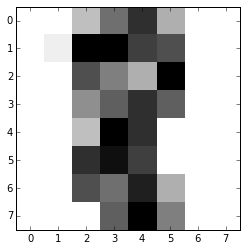

In [94]:
plt.imshow(x, cmap=plt.cm.gray_r, interpolation='nearest')

In [95]:
wp = pywt.WaveletPacket2D(data=x, wavelet='db1', mode='sym')

In [96]:
print(wp)

: [[  0.   0.   4.   9.  13.   5.   0.   0.]
 [  0.   1.  16.  16.  12.  11.   0.   0.]
 [  0.   0.  11.   8.   5.  16.   0.   0.]
 [  0.   0.   7.  10.  13.  10.   0.   0.]
 [  0.   0.   4.  16.  13.   0.   0.   0.]
 [  0.   0.  13.  15.  12.   0.   0.   0.]
 [  0.   0.  11.   9.  14.   5.   0.   0.]
 [  0.   0.   0.  10.  16.   8.   0.   0.]]


a - LL, low-low coefficients
h - LH, low-high coefficients
v - HL, high-low coefficients
d - HH, high-high coefficients

In [97]:
print wp['a'].data

[[  0.5  22.5  20.5   0. ]
 [  0.   18.   22.    0. ]
 [  0.   24.   12.5   0. ]
 [  0.   15.   21.5   0. ]]


In [98]:
new_wp = pywt.WaveletPacket2D(data=None, wavelet='db1', mode='sym')

In [99]:
new_wp['a'] =wp['a'].data
new_wp['h'] =wp['h'].data
new_wp['v'] =wp['v'].data
new_wp['d'] =[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]

In [100]:
ww = new_wp.reconstruct(update=False)
print ww

[[ -0.25   0.25   5.25   7.75  11.25   6.75   0.     0.  ]
 [  0.25   0.75  14.75  17.25  13.75   9.25   0.     0.  ]
 [  0.     0.     9.5    9.5    8.5   12.5    0.     0.  ]
 [  0.     0.     8.5    8.5    9.5   13.5    0.     0.  ]
 [  0.     0.     6.5   13.5   12.75   0.25   0.     0.  ]
 [  0.     0.    10.5   17.5   12.25  -0.25   0.     0.  ]
 [  0.     0.     8.    12.    13.75   5.25   0.     0.  ]
 [  0.     0.     3.     7.    16.25   7.75   0.     0.  ]]


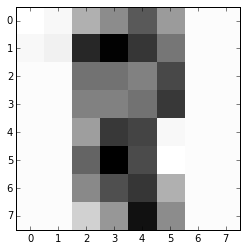

In [101]:
plt.imshow(ww, cmap=plt.cm.gray_r, interpolation='nearest')

In [102]:
clf = svm.SVC(gamma=0.001, C=100)

In [103]:
X,y = digits.data[:-10], digits.target[:-10]

In [104]:
clf.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [105]:
wN = np.array(ww).flatten()
print(wN)

[ -0.25   0.25   5.25   7.75  11.25   6.75   0.     0.     0.25   0.75
  14.75  17.25  13.75   9.25   0.     0.     0.     0.     9.5    9.5    8.5
  12.5    0.     0.     0.     0.     8.5    8.5    9.5   13.5    0.     0.
   0.     0.     6.5   13.5   12.75   0.25   0.     0.     0.     0.    10.5
  17.5   12.25  -0.25   0.     0.     0.     0.     8.    12.    13.75
   5.25   0.     0.     0.     0.     3.     7.    16.25   7.75   0.     0.  ]


In [106]:
print(clf.predict(wN))

[8]
